In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

In [12]:
ROOT = 'D:/Documents/checkpoints'

In [13]:
def visualize(path: str):
    df = pd.read_hdf(f'{path}/compression_metrics.h5')

    paths = glob.glob(os.path.join(path, '*.png'))[:2]
    images = list(map(lambda path: Image.open(path), paths))

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Images')
    ax[0].imshow(images[0])
    ax[1].imshow(images[1])

    means = {
        'PSNR': df['PSNR'].mean(),
        'MS_SSIM': df['MS_SSIM'].mean()
    }

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    fig.suptitle('Metrics of PSNR, MS_SSIM, bpp')

    ax[0][0].hist(df['PSNR'])
    ax[0][0].set_title(f'PSNR density $\mu={df["PSNR"].mean():.2f}$')

    ax[0][1].hist(df['MS_SSIM'])
    ax[0][1].set_title(f'MS_SSIM density $\mu={df["MS_SSIM"].mean():.4f}$')

    ax[1][0].scatter(df['q_bpp'], df['PSNR'])
    ax[1][0].set_title('PSNR / bpp scatter')

    ax[1][1].scatter(df['q_bpp'], df['MS_SSIM'])
    ax[1][1].set_title('MS_SSIM / bpp scatter')

    return df['PSNR'].mean(), df['MS_SSIM'].mean(), df['q_bpp'].mean()

In [20]:
means = []

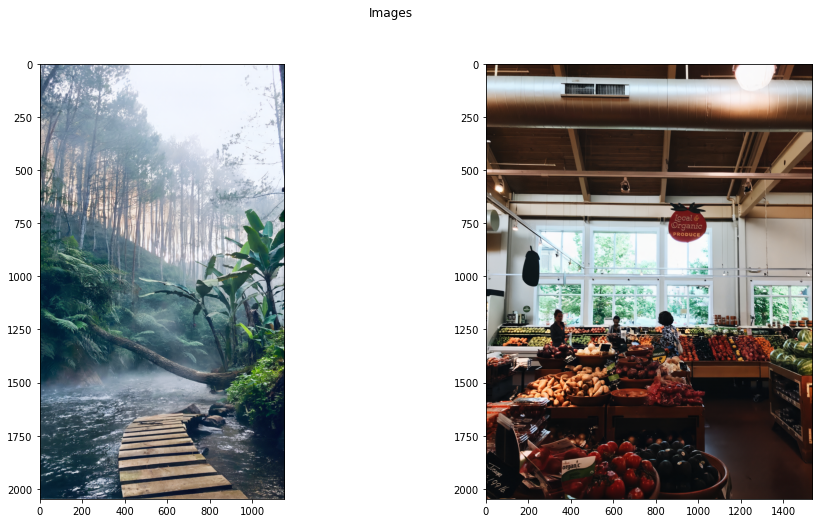

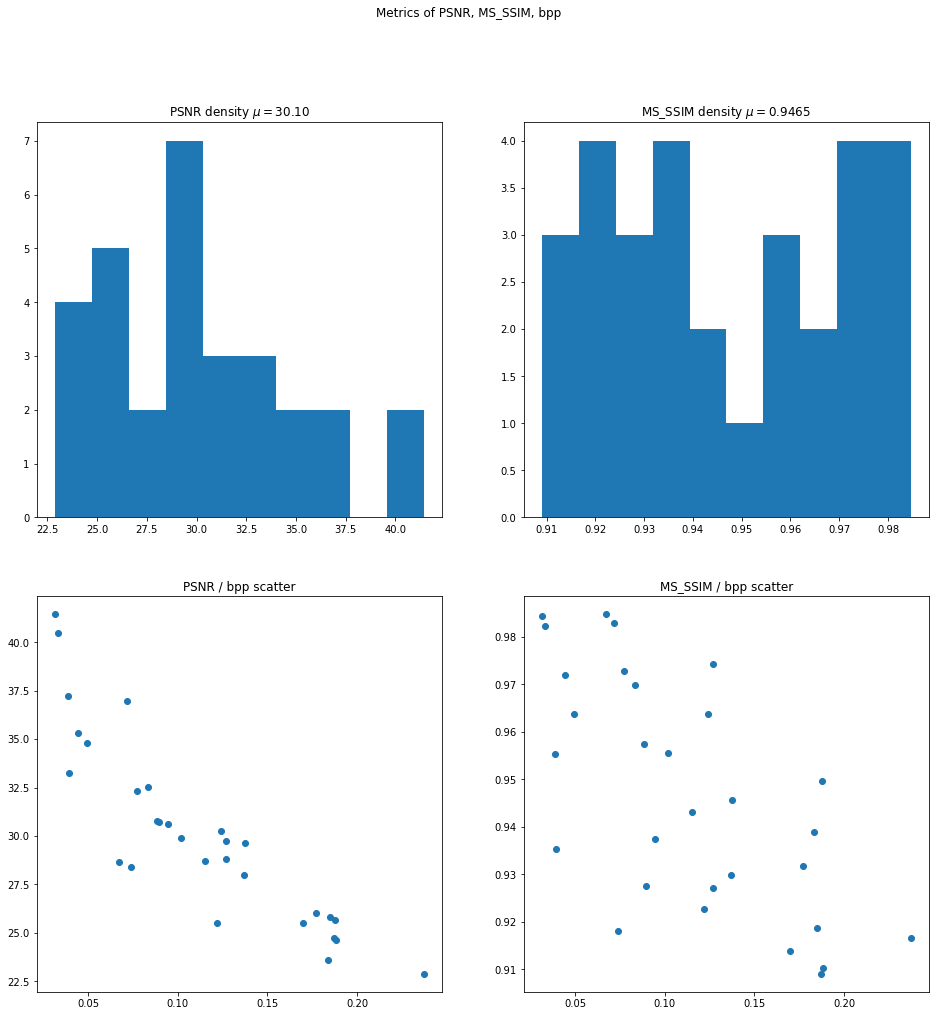

In [21]:
means += visualize(f'{ROOT}/low')

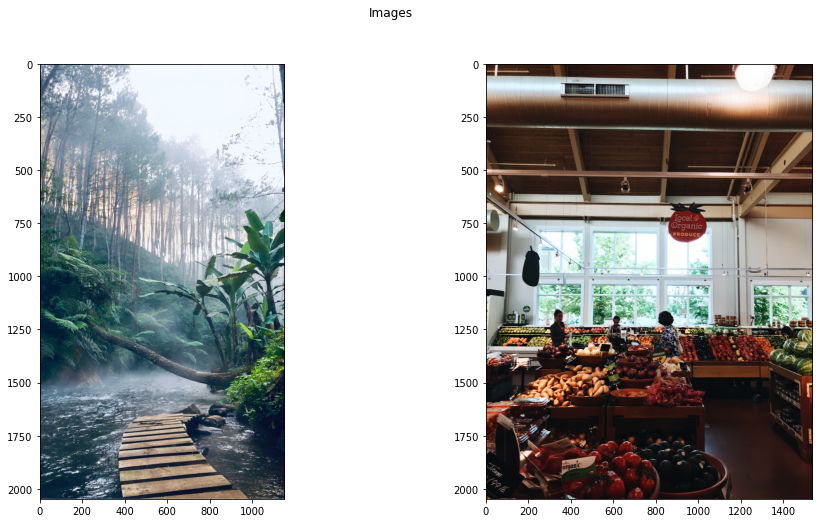

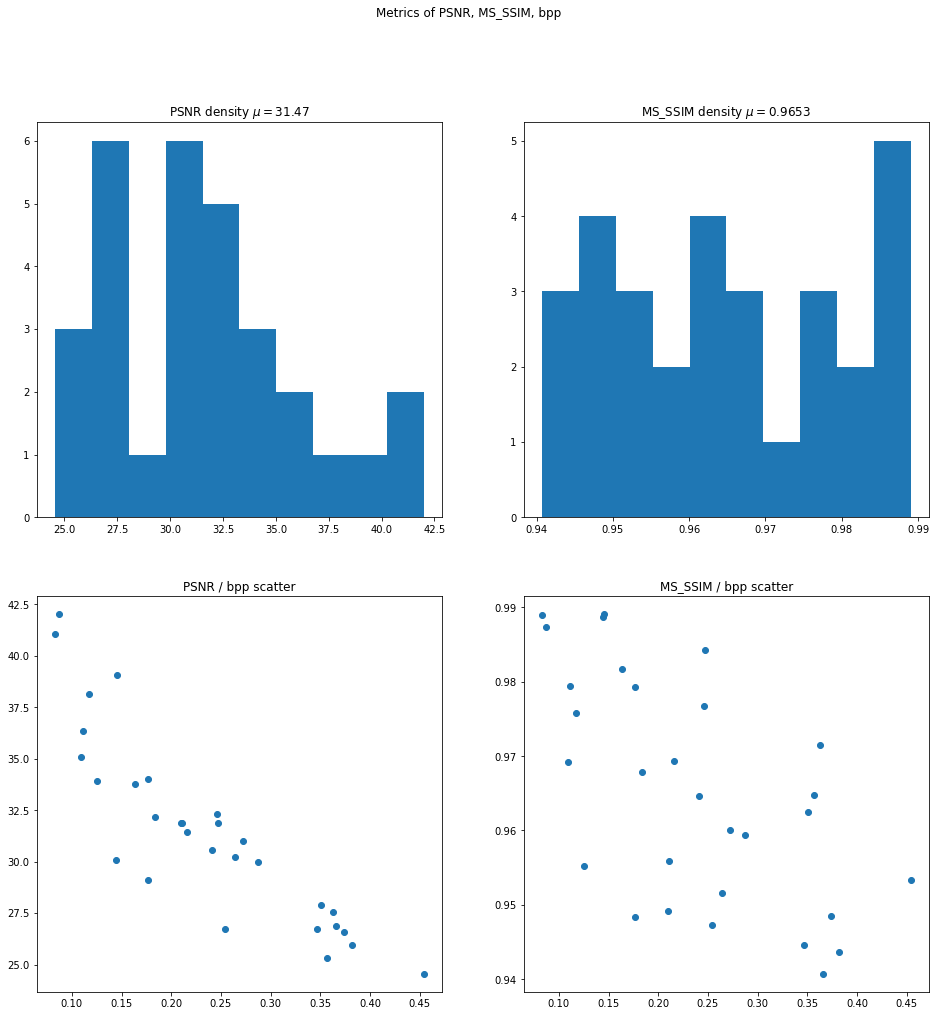

In [22]:
means += visualize(f'{ROOT}/med')

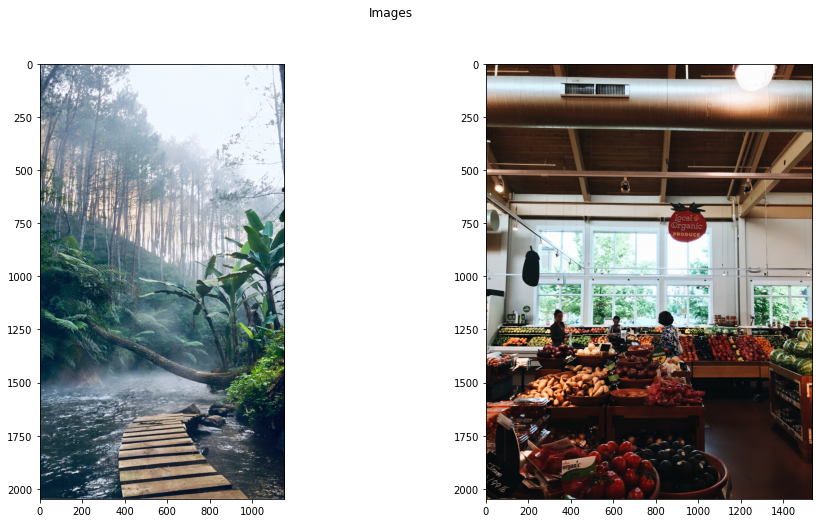

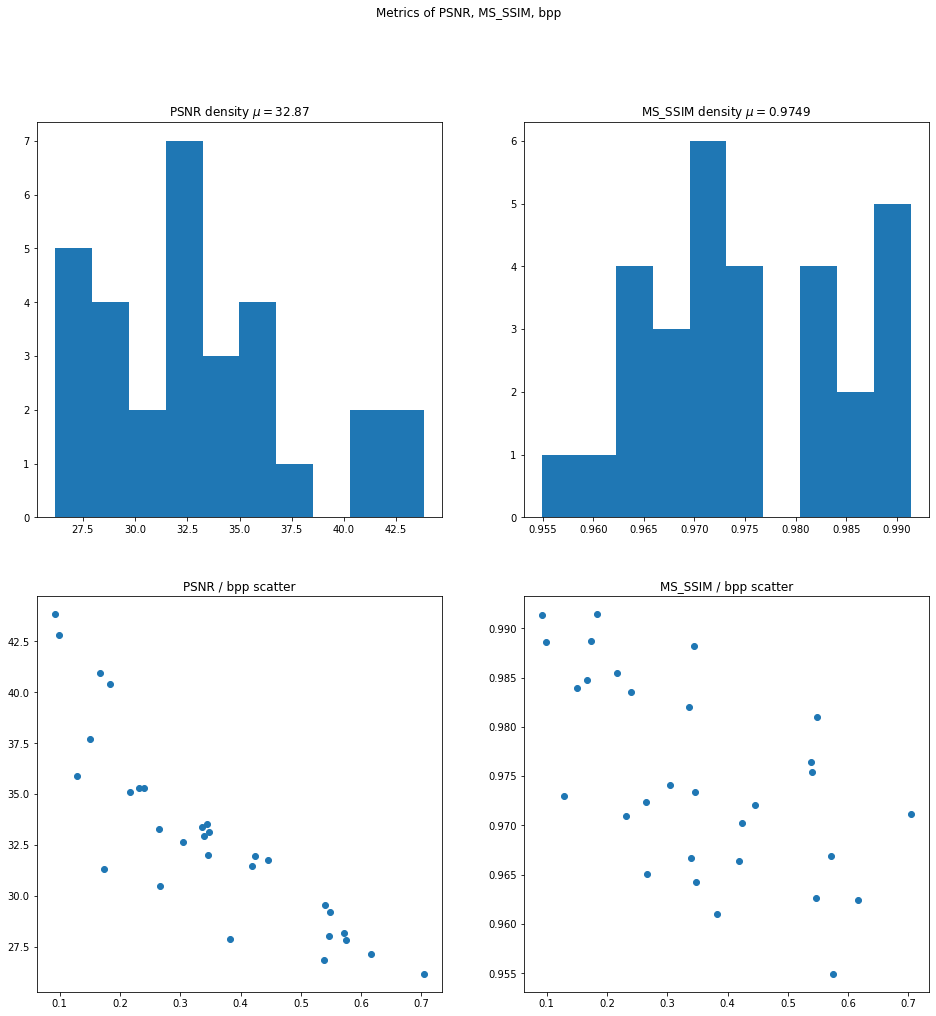

In [23]:
means += visualize(f'{ROOT}/hi')

Text(0.5, 1.0, 'PSNR / bpp')

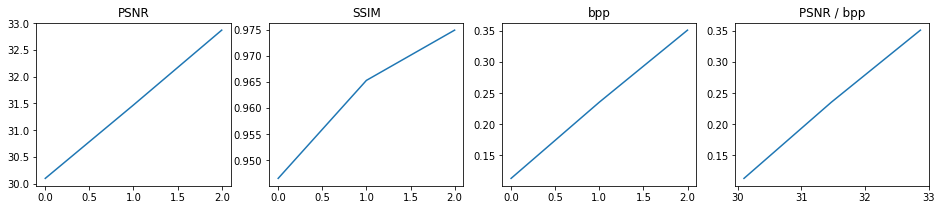

In [24]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

ax[0].plot([i for i in range(len(means[::3]))], list(means[::3]))
ax[0].set_title('PSNR')
ax[1].plot([i for i in range(len(means[1::3]))], list(means[1::3]))
ax[1].set_title('SSIM')
ax[2].plot([i for i in range(len(means[2::3]))], list(means[2::3]))
ax[2].set_title('bpp')
ax[3].plot(means[::3], means[2::3])
ax[3].set_title('PSNR / bpp')


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

ax[0][0].imshow(Image.open(f'{ROOT}/compression/epoch_10/00046b471483cc63_RECON_1.093bpp.png'))
ax[0][0].set_title('Epoch 10 (compression)')
ax[0][1].imshow(Image.open(f'{ROOT}/compression_gan/epoch_4/00046b471483cc63_RECON_1.391bpp.png'))
ax[0][1].set_title('Epoch 4 (GAN)')
ax[1][0].imshow(Image.open(f'{ROOT}/compression_gan/epoch_5/00046b471483cc63_RECON_1.257bpp.png'))
ax[1][0].set_title('Epoch 5 (GAN)')
ax[1][1].imshow(Image.open(f'{ROOT}/compression_gan/epoch_6/00046b471483cc63_RECON_1.323bpp.png'))
ax[1][1].set_title('Epoch 6 (GAN)')

Text(0, 0.5, 'Pike signal to noise ration (PSNR)')

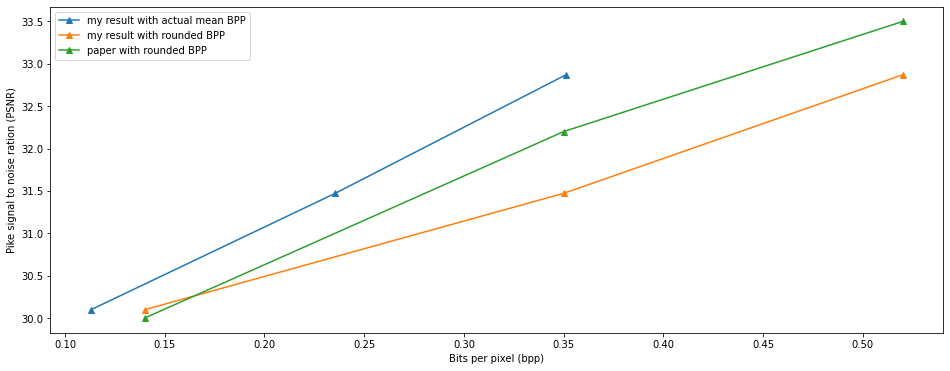

In [26]:
psnr_means = means[::3]

original = [30, 32.2, 33.5]
original_bpp = [0.14, 0.35, 0.52]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(means[2::3], psnr_means, "^-")
ax.plot(original_bpp, psnr_means, "^-")
ax.plot(original_bpp, original, "^-")
ax.legend(["my result with actual mean BPP", "my result with rounded BPP", "paper with rounded BPP" ])
ax.set_xlabel("Bits per pixel (bpp)")
ax.set_ylabel("Pike signal to noise ration (PSNR)")

In [2]:
import torch
from deblocking.CNNs.mymodel import ARCNN, ARDenseNet

model = ARDenseNet()
model.load_state_dict(torch.load('deblocking/model_parameters/ARDenseNet_qp42-28-0.001368-28.6754-0.8436param.pth'))
model.to(torch.device('cuda'))

ARDenseNet(
  (relu): PReLU(num_parameters=1)
  (lowlevel): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bottleneck): Conv2d(640, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (reconstruction): Conv2d(256, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (denseblock1): Sequential(
    (0): _Dense_Block(
      (relu): PReLU(num_parameters=1)
      (conv1): Conv2d(128, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv3): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv4): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv5): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv6): Conv2d(80, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv7): Conv2d(96, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv8): Conv2d(112, 16, kernel_

INPUT : torch.Size([1, 3, 128, 192])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


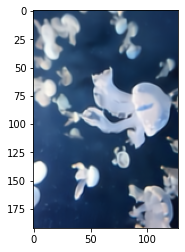

In [5]:
from PIL import Image
from torchvision import transforms as T

image = Image.open(r'D:\Documents\project\thesis\data\reconstructions\alberto-montalesi-176097_RECON_0.068bpp.png')
transform = T.Compose([
    T.Resize((128,)),
    T.ToTensor()
])
image = transform(image.convert('RGB')).cuda()

input = image.unsqueeze(0) # torch.rand((1, 3, 64, 64)).cuda()
print(f'INPUT : {input.shape}')
output = model(input).detach().cpu()

import matplotlib.pyplot as plt

plt.imshow(output[0].transpose(0, 2))